In [1]:
%matplotlib widget
# %matplotlib inline

import numpy as np
import cmath
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    'text.latex.preamble': r"\usepackage{amsmath} \boldmath"
})
import os
print(os.getpid())
%cd ../../

import pylib.mix as mix
import kvn
import pylib.Chebyschev_coefs as ch
import pylib.qucf_read as qucf_r
import pylib.measurement as mse

9070
/media/work/docs/codes/QuCF/scripts-py


In [2]:
# ---------------------------------------------------------------------------------------------------
# --- Some global parameters ---
# ---------------------------------------------------------------------------------------------------
colors_ = ["b", "r", "g", "magenta", "black"]
path_save_ = "./jupyter-notebooks/NL/results/"
for _ in range(30):
    plt.close()

In [3]:
# ---------------------------------------------------------------------------------------------------
# --- Prepare intial parameters ---
# ---------------------------------------------------------------------------------------------------
mix.reload_module(kvn)

# --- two attractors ---
F_ = lambda x:  - x* (x**2 - 0.25)
# ----------------------------------------

nx_ = 7 
nk_    = 7
k_max_ = 10

# --- Linear x- grid ---
Nx_ = 1 << nx_
x_lin_ = np.linspace(-1.0, 1.0, Nx_)  
dx_    = np.diff(x_lin_)[0]
print("nx: {:d}".format(nx_))

# --- k-grid ---
Nk_    = 1 << nk_
k_     = np.linspace(-k_max_, k_max_, Nk_)
dk_    = np.diff(k_)[0]

_, Aa_, Ah_, Aa_asin_, Ah_asin_ = kvn.construct_UW_matrix_1D(x_lin_, F_, flag_asin = True)
# _, Aa_, Ah_, _, _ = kvn.construct_UW_matrix_1D(x_lin_, F_)

nx: 7


In [4]:
# ----------------------------------------------------------
# --- Parameters for the LCHS simulation ---
# > Normalize matrices.
# ----------------------------------------------------------
mix.reload_module(kvn)

# --- LCHS matrices ---
print("--- OPTION 1: over the linear x-grid, i.e. the reference case -----------")
Ba_, Bm_, Bk_ = kvn.compute_norm_matrices_LCHS(Aa_, Ah_, k_max_, dk_)
print("\n---")
Ba_asin_, Bm_asin_, Bk_asin_ = kvn.compute_norm_matrices_LCHS(Aa_asin_, Ah_asin_, k_max_, dk_)

# ------------------------------------------------------
# --- Parameters for the SIN-gate ---
print("nx \t{:d}".format(nx_))

# --- main grid ---
alpha_x0 = - 1.0
alpha_x1 = np.abs(alpha_x0) * Nx_/(Nx_ - 1)
print("\n// --- SIN-gate: main diagonal ---")
print("alpha_x0_main \t{:0.12e}".format(alpha_x0))
print("alpha_x1_main \t{:0.12e}".format(alpha_x1))

# --- left diagonal ---
alpha_x0 = - 1.0 - dx_
alpha_x1 =  (2*np.abs(alpha_x0) - dx_ )* Nx_/((Nx_ - 1)*2.)
print("\n// --- SIN-gate: left diagonal ---")
print("alpha_x0_left \t{:0.12e}".format(alpha_x0))
print("alpha_x1_left \t{:0.12e}".format(alpha_x1))

# --- right diagonal ---
alpha_x0 = - 1.0
alpha_x1 = (2*np.abs(alpha_x0) + dx_ )* Nx_/((Nx_ - 1)*2.)
print("\n// --- SIN-gate: right diagonal ---")
print("alpha_x0_right \t{:0.12e}".format(alpha_x0))
print("alpha_x1_right \t{:0.12e}".format(alpha_x1))

--- OPTION 1: over the linear x-grid, i.e. the reference case -----------
Matrix Ba:	 nonsparsity, coefnorm: 2, 6.359e+01
Matrix B_kmax:	 nonsparsity, coefnorm: 3, 1.651e+03
Matrix Bk:	 nonsparsity, coefnorm: 3, 2.600e+01

norm of Ba_norm_:     0.500
norm of B_kmax_norm_: 0.333
norm of Bk_norm_:     0.333

---
Matrix Ba:	 nonsparsity, coefnorm: 2, 2.899e+02
Matrix B_kmax:	 nonsparsity, coefnorm: 3, 7.529e+03
Matrix Bk:	 nonsparsity, coefnorm: 3, 1.186e+02

norm of Ba_norm_:     0.500
norm of B_kmax_norm_: 0.333
norm of Bk_norm_:     0.333
nx 	7

// --- SIN-gate: main diagonal ---
alpha_x0_main 	-1.000000000000e+00
alpha_x1_main 	1.007874015748e+00

// --- SIN-gate: left diagonal ---
alpha_x0_left 	-1.015748031496e+00
alpha_x1_left 	1.015810031620e+00

// --- SIN-gate: right diagonal ---
alpha_x0_right 	-1.000000000000e+00
alpha_x1_right 	1.015810031620e+00



-------------------------------------------------------------------------
--- Ba-norm ---


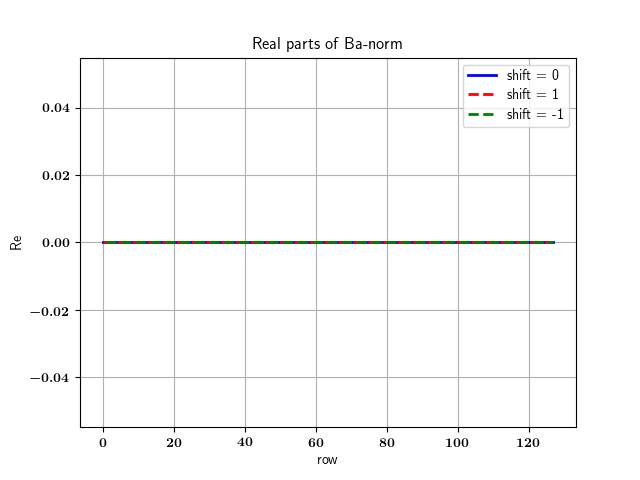

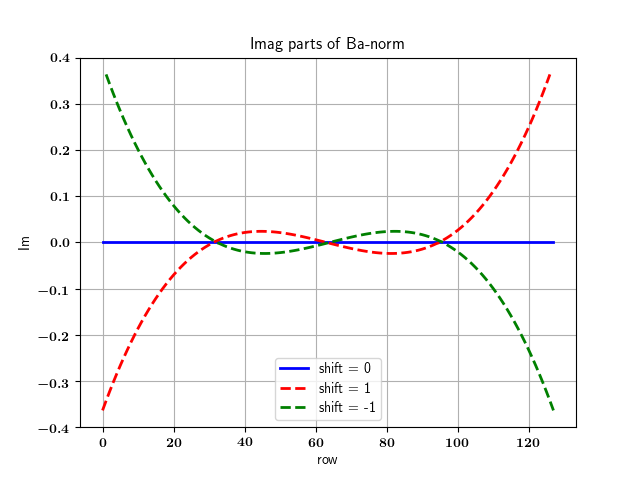


-------------------------------------------------------------------------
--- B-kmax-norm ---


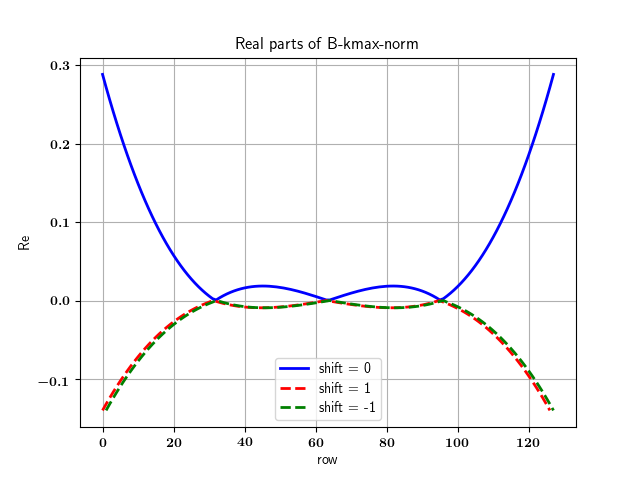

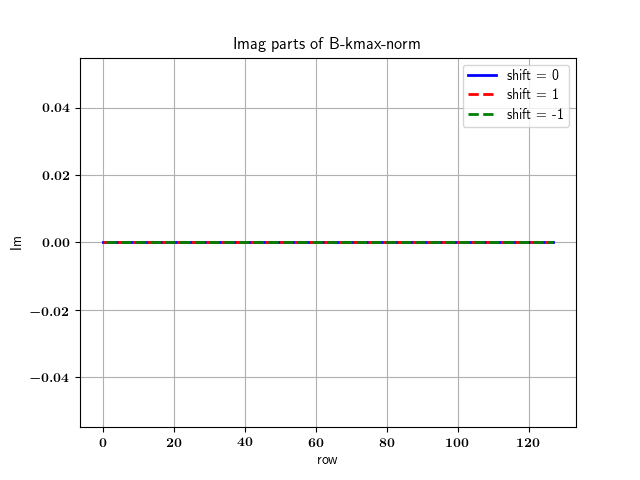

In [5]:
# ---------------------------------------------------------------
# --- Print diagonals of normalized (non-rescaled) matrices ---
# ---------------------------------------------------------------
mix.reload_module(kvn)

flag_save = False

print()
print("-------------------------------------------------------------------------")
print("--- Ba-norm ---")
A_plot, A_name, flag_save_real = Ba_,     "Ba-norm",     False
kvn.plot_save_diagonals(A_plot, A_name, flag_save, flag_save_real, path_save_)

print()
print("-------------------------------------------------------------------------")
print("--- B-kmax-norm ---")
A_plot, A_name, flag_save_real = Bk_, "B-kmax-norm", True
kvn.plot_save_diagonals(A_plot, A_name, flag_save, flag_save_real, path_save_)
del flag_save, A_plot, A_name, flag_save_real

In [7]:
# ---------------------------------------------------------------
# --- Rescale matrices to the bulk elements of the D-matrices ---
# ---------------------------------------------------------------
dd_diags_ref_  = kvn.get_rescaled_diags_BE(Ba_, Bm_, Bk_)
dd_diags_asin_ = kvn.get_rescaled_diags_BE(Ba_asin_, Bm_asin_, Bk_asin_)

max-ref / max-asin:  1.003465447088293


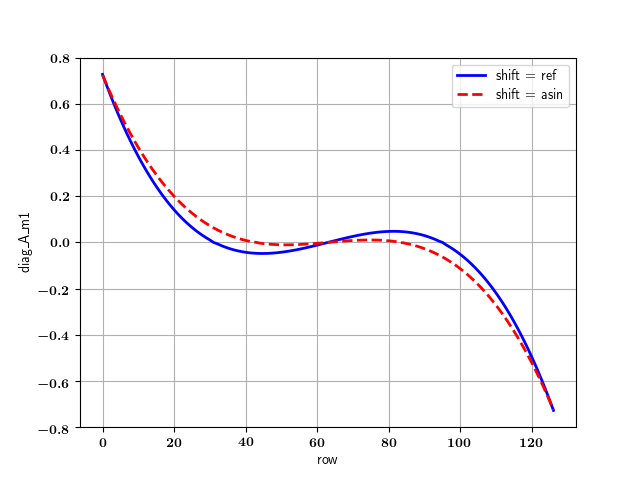

In [7]:
# ---------------------------------------------------------------
# --- Plot rescaled diagonals ---
# ---------------------------------------------------------------
def plot_diags(key_diag):
    diag_ref  = np.array(dd_diags_ref_[key_diag])
    diag_asin = np.array(dd_diags_asin_[key_diag])

    range_x = range(len(diag_ref))

    print("max-ref / max-asin: ", np.max(np.abs(diag_ref)) / np.max(np.abs(diag_asin)) )

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range_x, diag_ref,  color='b', linewidth = 2, linestyle='-',  label = "shift = ref")
    ax.plot(range_x, diag_asin, color='r', linewidth = 2, linestyle='--', label = "shift = asin")
    plt.xlabel('row')
    plt.ylabel(key_diag)
    plt.legend()
    plt.grid(True)
    plt.show()
    return
# -------------------------------
key_diag = "diag_A_m1"
plot_diags(key_diag)
del key_diag

In [59]:
# --------------------------------------------------------------------------------------
# --- Choose the case to analyse ---
# --------------------------------------------------------------------------------------
flag_prepared = True # True: read QuCF data from separate precomputed .hdf5 file 
id_diag_ = 0

# >>> factor_global_: additional normalization factor in the Hamiltonian simulation;

# --- Diagonals of the matrix Ba ---
if id_diag_ == 0:
    key_diag_, str_ch_, parity_1_, factor_global_, factor_loc_ = \
        "diag_A_m1", "prof_A_m1", 1,\
            4.555319024641e+00, 1.0 
    id_shift_ = -1
    input_rx_ = Nx_ - 1
    ax_state_ = 1
    
if id_diag_ == 1:
    key_diag_, str_ch_, parity_1_, factor_global_, factor_loc_ = \
        "diag_A_p1", "prof_A_p1", 1,\
            4.555319024641e+00, 1.0
    id_shift_ = +1
    input_rx_ = 0
    ax_state_ = 0

# --- Diagonals of the matrix B_max ---
if id_diag_ == 10:
    key_diag_, str_ch_, parity_1_, factor_global_, factor_loc_ = \
        "diag_kmax_m1", "prof_kmax_m1", 0,\
            4.557453940854e+00, 1.0
    id_shift_ = -1
    input_rx_ = Nx_ - 1
    ax_state_ = 2

if id_diag_ == 11:
    key_diag_, str_ch_, parity_1_, factor_global_, factor_loc_ = \
        "diag_kmax_00", "prof_kmax_00", 0,\
            4.557453940854e+00, 4.560220926459e+00/4.557453940854e+00
    id_shift_ = 0
    input_rx_ = Nx_ - 1
    ax_state_ = 0

if id_diag_ == 12:
    key_diag_, str_ch_, parity_1_, factor_global_, factor_loc_ = \
        "diag_kmax_p1", "prof_kmax_p1", 0,\
            4.557453940854e+00, 1.0
    id_shift_ = +1
    input_rx_ = 0
    ax_state_ = 1

# --- Diagonals of the matrix Bk ---
if id_diag_ == 100:
    key_diag_, str_ch_, parity_1_, factor_global_, factor_loc_ = \
        "diag_k_m1", "prof_k_m1", 0,\
            4.557453940854e+00, 1.0
    id_shift_ = -1
    input_rx_ = Nx_ - 1
    ax_state_ = 2

if id_diag_ == 101:
    key_diag_, str_ch_, parity_1_, factor_global_, factor_loc_ = \
        "diag_k_00", "prof_k_00", 0,\
            4.557453940854e+00, 4.560220926459e+00/4.557453940854e+00
    id_shift_ = 0
    input_rx_ = Nx_ - 1
    ax_state_ = 0

if id_diag_ == 102:
    key_diag_, str_ch_, parity_1_, factor_global_, factor_loc_ = \
        "diag_k_p1", "prof_k_p1", 0,\
            4.557453940854e+00, 1.0
    id_shift_ = +1
    input_rx_ = 0
    ax_state_ = 1

# --- Real or imaginary part ---
if id_diag_ < 10:
    flag_real_ = False
    coef_resc_ = dd_diags_asin_["coef_A"]
else:
    flag_real_ = True
    if id_shift_ == 0:
        coef_resc_ = dd_diags_asin_["coef_k_0"]
    else:
        coef_resc_ = dd_diags_asin_["coef_k_mp"]

# --- The name of the .hdf5 file to read the QuCF data from ---
if flag_prepared:
    if id_diag_ < 10:
        name_qucf_hdf5_ = "kvn_Ba_OUTPUT.hdf5"
    elif id_diag_ < 100:
        name_qucf_hdf5_ = "kvn_Bmax_OUTPUT.hdf5"
    else:
        name_qucf_hdf5_ = "kvn_Bk_OUTPUT.hdf5"
else:
    name_qucf_hdf5_ = "kvn_OUTPUT.hdf5"

# --- Reference non-rescaled matrices ---
if id_diag_ < 10:
    B_ref_ = Ba_
elif id_diag_ < 100:
    B_ref_ = Bm_
else:
    B_ref_ = Bk_

# --- The chosen diagonal ---
diag_ch_ = np.array(dd_diags_asin_[key_diag_])
diag_ch_ *= factor_loc_

# --- Print ---
print()
print("--- Chosen parameters ---")
print("Data will be read from: ", name_qucf_hdf5_)
print("Key: ", key_diag_)
print("Diagonal's shift: ", id_shift_)
print("Corresponding ancilla state: ", ax_state_)
print()

del flag_prepared


--- Chosen parameters ---
Data will be read from:  kvn_Ba_OUTPUT.hdf5
Key:  diag_A_m1
Diagonal's shift:  -1
Corresponding ancilla state:  1




--------------------------------------------------------------------
--- Chebyschev coefficients ---
--------------------------------------------------------------------

--------------------------------------------------------------------
--- Computing Chebyschev coefficients ---
--------------------------------------------------------------------
Chosen profile: prof_A_m1
Chosen parity: 1

Minimization method is used.
Computation status:  0.004673262506906682

x[0] =  -0.999923511388017
x[-1] =  0.999923511388017
Chosen polynomial's degree:	 20
Number of coefficients:		 10
max. abs. error: 3.167e-02


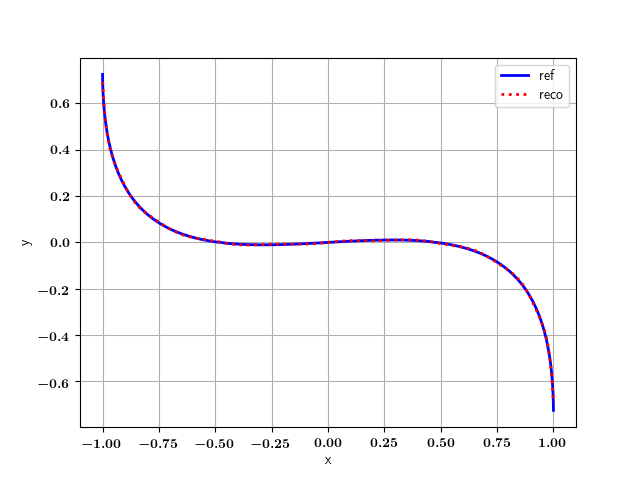

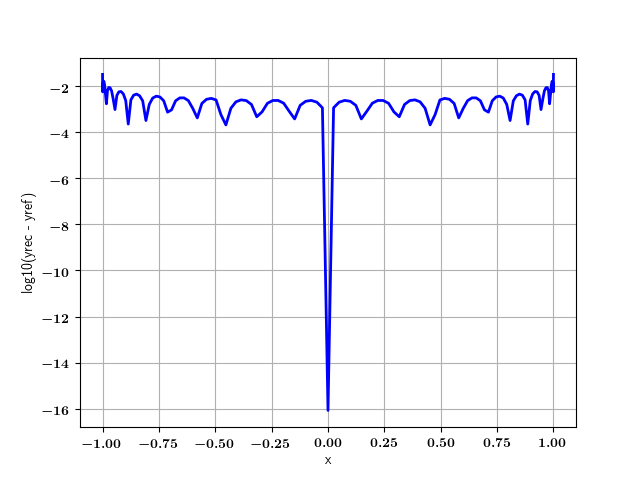

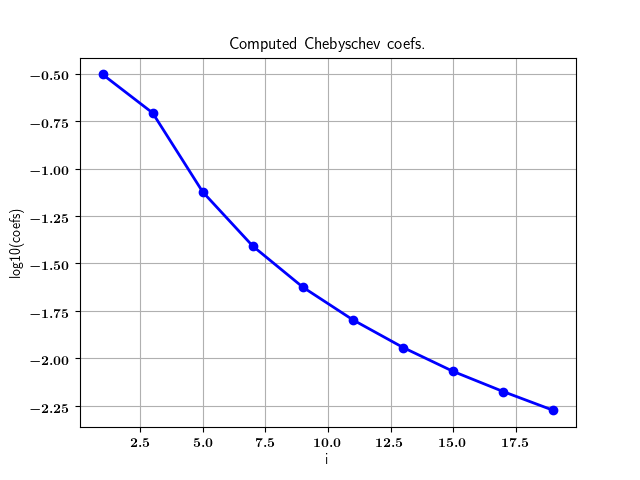


--------------------------------------------------------------------
--- Reconstructed profile ---
--------------------------------------------------------------------


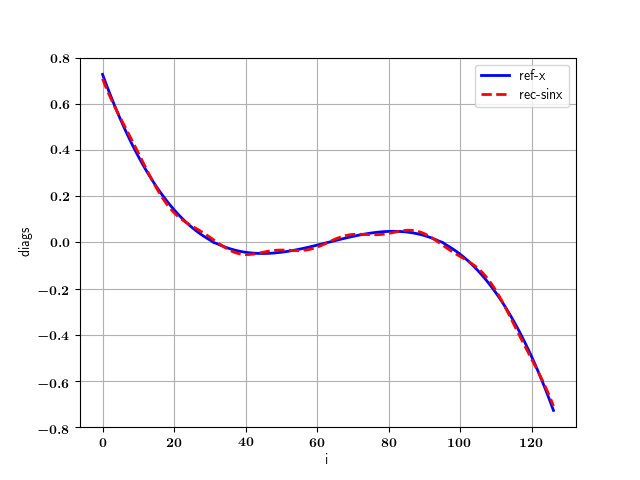

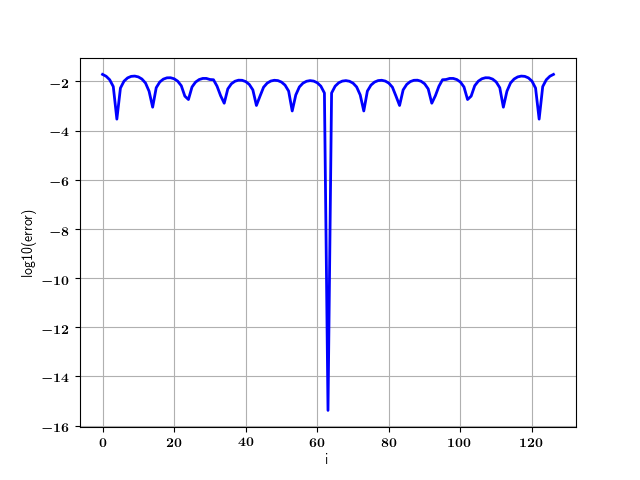

write data to a file: ./jupyter-notebooks/NL/results//diag_A_m1_ERR_Nc10.dat


In [66]:
# --------------------------------------------------------------------------------------
# --- Compute the Chebyschev coefficients for the QSVT computations of the BE oracle ---
# --------------------------------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(ch)
mix.reload_module(kvn)

def compute_Cheb_coefs(diag_ch, name_prof_1, parity_1, Nd, flag_save_hdf5, flag_save_dat):
    sel_method = 0

    oo_ch_ = ch.Ch_()
    oo_ch_.choose_method(sel_method)
    oo_ch_.choose_func(
        -1, 0.0, 
        profile_in = diag_ch,
        name_prof  = name_prof_1,
        parity_in  = parity_1,
        path_root_in = "./jupyter-notebooks/NL/BE/coefs/"
    )
    oo_ch_.compute_Ch(Nd)
    oo_ch_.plot_reconstructed_function()
    oo_ch_.plot_errors()
    oo_ch_.plot_coefficients()

    if flag_save_hdf5:
        oo_ch_.save_coefficients()

    if flag_save_dat:
        # - Chebyschev coefficients -
        fname = "{:s}_Cheb{:d}.dat".format(key_diag_, oo_ch_.Nc_)
        mix.save_dat_plot_1d_file(
            path_save_ + "/" + fname, 
            range(oo_ch_.Nc_), 
            np.log10(np.abs(oo_ch_.coefs_))
        )
    return oo_ch_


def test_recon_sin(oo, flag_save_err):
    range_x = range(len(diag_ch_))

    y_ref = np.array(dd_diags_ref_[key_diag_])
    y_rec = oo_temp_ch.get_rec_y_sin_x()
    y_rec *= factor_global_

    # --- Error ---
    log_err = np.zeros(len(y_rec))
    for ii in range(len(y_rec)):
        err1 = np.abs(y_rec[ii] - y_ref[ii])
        if err1 < 1e-17:
            err1 = 1e-17
        log_err[ii] = np.log10(err1)

    # --- PLOTTING ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range_x, y_ref, "-",  color="b", linewidth = 2, label = "ref-x")
    ax.plot(range_x, y_rec, "--", color="r", linewidth = 2, label = "rec-sinx")
    plt.xlabel('i')
    plt.ylabel("diags")
    plt.legend()
    plt.grid(True)
    plt.show() 

    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range_x, log_err,  color="b", linewidth = 2, linestyle='-')
    plt.xlabel('i')
    plt.ylabel("log10(error)")
    plt.grid(True)
    plt.show() 

    if flag_save_err:
        # - errors -
        fname = "{:s}_ERR_Nc{:d}.dat".format(key_diag_, oo.Nc_)
        mix.save_dat_plot_1d_file(path_save_ + "/" + fname, range_x, log_err)
    return

# -----------------------------------------------------------------------------------
# --- Find the Chebyschev coefficients of the series ---
# -----------------------------------------------------------------------------------
print()
print("--------------------------------------------------------------------")
print("--- Chebyschev coefficients ---")
print("--------------------------------------------------------------------")
flag_save_hdf5 = False
flag_save_dat_coefs = False
flag_save_dat_err = True
Nd = 20

print()
print("--------------------------------------------------------------------")
print("--- Computing Chebyschev coefficients ---")
print("--------------------------------------------------------------------")
oo_temp_ch = compute_Cheb_coefs(
    diag_ch_, str_ch_, parity_1_, Nd, 
    flag_save_hdf5, 
    flag_save_dat_coefs
)

print()
print("--------------------------------------------------------------------")
print("--- Reconstructed profile ---")
print("--------------------------------------------------------------------")
test_recon_sin(oo_temp_ch, flag_save_dat_err)

# --------------------------------------------
# ratio factors:
# Ba-m1: 4.555319024641e+00
# Ba-p1: 4.555319011284e+00
# ---
# Bm-m1: 4.557453940854e+00
# Bm-00: 4.560220926459e+00
# Bm-p1: 4.557453940854e+00
# ---
# Bk-m1: 4.557453940511e+00
# Bk-00: 4.560220912593e+00
# Bk-p1: 4.557453940511e+00

del Nd, flag_save_hdf5, flag_save_dat_coefs, flag_save_dat_err


key_diag_:  diag_kmax_00
id_shift_:  0
flag_real_:  True

Reading the matrix from: kvn_Bmax_OUTPUT.hdf5
from the path: ../QuCF/simulations/LCHS-KvN/
date of the simulation:  02-13-2024 22:03:48
matrix name:  U
N = 128


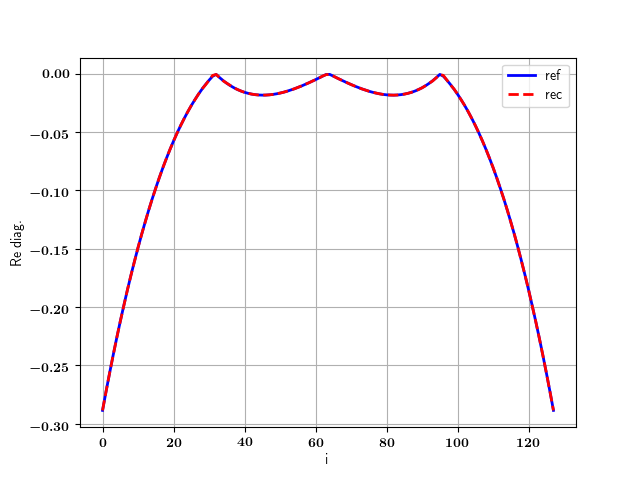

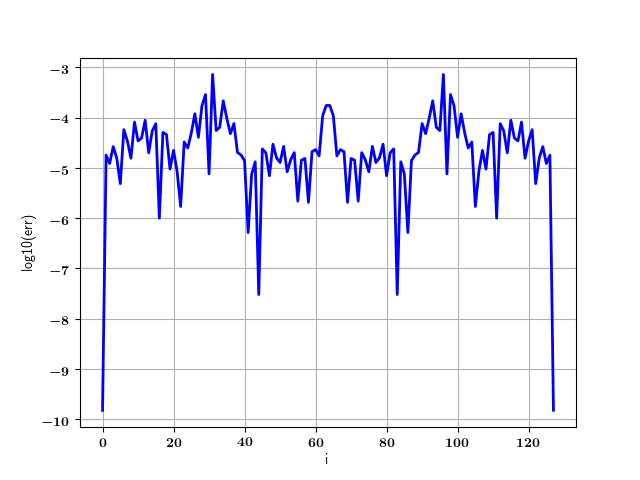

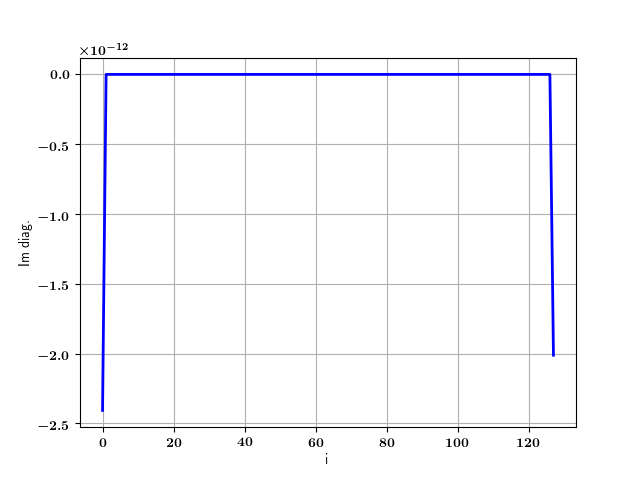

log10|max.err|:  -3.030727551219449
write data to a file: ./jupyter-notebooks/NL/results//diag_kmax_00_REF.dat
write data to a file: ./jupyter-notebooks/NL/results//diag_kmax_00_REC.dat
write data to a file: ./jupyter-notebooks/NL/results//diag_kmax_00_LOG_ERROR.dat


In [43]:
# ---------------------------------------------------------------------------------------
# --- Compare with the QuCF computations ---
# ---------------------------------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(qucf_r)
mix.reload_module(kvn)

def compare_to_qucf(flag_save):
    print()
    print("key_diag_: ", key_diag_)
    print("id_shift_: ", id_shift_)
    print("flag_real_: ", flag_real_)
    print()

    # ---
    diag_ref = np.array(dd_diags_ref_[key_diag_]) * coef_resc_

    # --- Read data from QuCF simulations ---
    dd_loc    = qucf_r.read_matrix_sparse(
        "../QuCF/simulations/LCHS-KvN/", 
        name_qucf_hdf5_
    ) 

    # The matrix computed by the BE oracle:
    B_rec = dd_loc["A"].form_dense_matrix() * factor_global_

    # The chosen diagonal:
    diag_rec_full = np.array(kvn.get_diag(B_rec, id_shift_)[0])
    if flag_real_:
        str_label = "Re"
        str_label_alt = "Im"
        diag_rec = diag_rec_full.real
        diag_alt = diag_rec_full.imag
    else:
        str_label = "Im"
        str_label_alt = "Re"
        diag_rec = diag_rec_full.imag
        diag_alt = diag_rec_full.real

    # --- Considered range ---
    range_x = range(len(diag_rec))
    diag_ref = diag_ref[range_x]
    diag_rec = diag_rec[range_x]

    # --- Normalization ---
    # diag_rec *= factor_global_
    # diag_rec /= coef_resc_ # because, the BE returns non-rescaled values !!!

    # --- Error ---
    log_err = np.zeros(len(diag_rec))
    for ii in range(len(diag_rec)):
        temp = np.abs(diag_rec[ii] - diag_ref[ii])
        if temp <= 1e-16:
            temp = 0
        log_err[ii] = np.log10(temp)

    # --- PLOTTING profiles ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range_x, diag_ref, color="b", linewidth = 2, linestyle='-',  label = "ref")
    ax.plot(range_x, diag_rec, color="r", linewidth = 2, linestyle='--', label = "rec")
    plt.xlabel('i')
    plt.ylabel(str_label + " diag.")
    plt.legend()
    plt.grid(True)
    plt.show() 

    # --- PLOTTING error ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range_x, log_err, color="b", linewidth = 2, linestyle='-')
    plt.xlabel('i')
    plt.ylabel("log10(err)")
    plt.grid(True)
    plt.show() 

    # --- PLOTTING alternative ---
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(range_x, diag_alt, color="b", linewidth = 2, linestyle='-')
    plt.xlabel('i')
    plt.ylabel(str_label_alt + " diag.")
    plt.grid(True)
    plt.show() 

    # --- Compare BE oracle matrix with the encoded matrix ---
    mix.compare_matrices_dense(B_ref_, B_rec, flag_return_err=True)

    # --- Save data ---
    if flag_save:

        # - original profile -
        fname = "{:s}_REF.dat".format(key_diag_)
        mix.save_dat_plot_1d_file(path_save_ + "/" + fname, range_x, diag_ref)

        # - reconstructed profile -
        fname = "{:s}_REC.dat".format(key_diag_)
        mix.save_dat_plot_1d_file(path_save_ + "/" + fname, range_x, diag_rec)

        # - errors -
        fname = "{:s}_LOG_ERROR.dat".format(key_diag_)
        mix.save_dat_plot_1d_file(path_save_ + "/" + fname, range_x, log_err)
    return
# ----------------------------------------------------------------------
compare_to_qucf(flag_save = True)        

In [42]:
# --------------------------------------------------------------------------------------
# --- Correcting edge elements ---
# --------------------------------------------------------------------------------------
mix.reload_module(mse)

# -----------------------------------------------------------------------------
# To compute the correcting angles, do the following in the kvn.oracle file:
# > comment oracle OM and OF_BACKWARD in the correction BE oracle. 
# -----------------------------------------------------------------------------
def correcting_edge(id_diag):
    if id_diag < 10:
        coef_edge = dd_diags_ref_["coef_edge_A"]
    else:
        coef_edge = dd_diags_ref_["coef_edge_k"]

    # --- Reading QuCF simulations ---
    om = mse.MeasOracle__(True)
    om.path_ = "../QuCF/simulations/LCHS-KvN/"
    om.pname_ = "kvn"
    om.open()
    om.read_qsvt()

    if input_rx_ > 0:
        om.set_work_states(1)
    else:
        om.set_work_states(0)

    print()
    print("input_rx_: ", input_rx_)
    print("ax: ", ax_state_) 
    print("coef_resc_: ", coef_resc_)
    print("coef_edge: ", coef_edge)
    print()  

    # --- Current value ---
    curr_values = om.get_var_x(
        {"rx": input_rx_, "ax": ax_state_, "asin": 0},
        "ae"
    )
    print()
    print("{:20.3e}".format(curr_values[0]))
    print("{:20.3e}".format(curr_values[1]))

    # --- Required value ---
    goal_value = curr_values[0] * coef_resc_ / coef_edge

    # --- Compute the correction angles ---
    ayc, azc = mix.find_correcting_angles_for_Rc_FLOAT(
        goal_value, 
        curr_values
    )
    print()
    print("ay: {:0.12e}".format(ayc))
    print("az: {:0.12e}".format(azc))


    # ay2 = 2. * np.arccos(goal_value.imag/curr_values[0].imag)
    # print("v2: ay: {:0.12e}".format(ay2))

    return
# -----------------------------------------------
print()
print("--------------------------------------------------------------------")
print("--- Correcting angles ---")
print("--------------------------------------------------------------------")
correcting_edge(id_diag_)


--------------------------------------------------------------------
--- Correcting angles ---
--------------------------------------------------------------------
Reading the file ../QuCF/simulations/LCHS-KvN//kvn_OUTPUT.hdf5...
Name of the simulation is kvn
Simulation has been performed  02-14-2024 13:00:43

input_rx_:  0
ax:  0
coef_resc_:  0.5
coef_edge:  0.7071067811865475


0.000e+00+1.597e-01j
6.269e-01+0.000e+00j

ay: 2.352911288064e-01
az: 8.685491058579e-01


--- Reading D-matrices for BE oracles of the matrix Aa for various nx.
Reading the matrix from: DA_n3.hdf5
from the path: ../QuCF/simulations/LCHS-KvN/matrices-D
date of the simulation:  02-05-2024 10:29:47
matrix name:  U
N = 8

--- Reading D-matrices for BE oracles of the matrix Ah for various nx.
Reading the matrix from: Dk-n3.hdf5
from the path: ../QuCF/simulations/LCHS-KvN/matrices-D
date of the simulation:  02-05-2024 10:35:09
matrix name:  U
N = 8
--- Reading D-matrices for BE oracles of the matrix Aa for various nx.
Reading the matrix from: DA_n4.hdf5
from the path: ../QuCF/simulations/LCHS-KvN/matrices-D
date of the simulation:  02-05-2024 10:33:29
matrix name:  U
N = 16

--- Reading D-matrices for BE oracles of the matrix Ah for various nx.
Reading the matrix from: Dk-n4.hdf5
from the path: ../QuCF/simulations/LCHS-KvN/matrices-D
date of the simulation:  02-05-2024 10:35:27
matrix name:  U
N = 16
--- Reading D-matrices for BE oracles of the matrix Aa for various nx.
Reading t

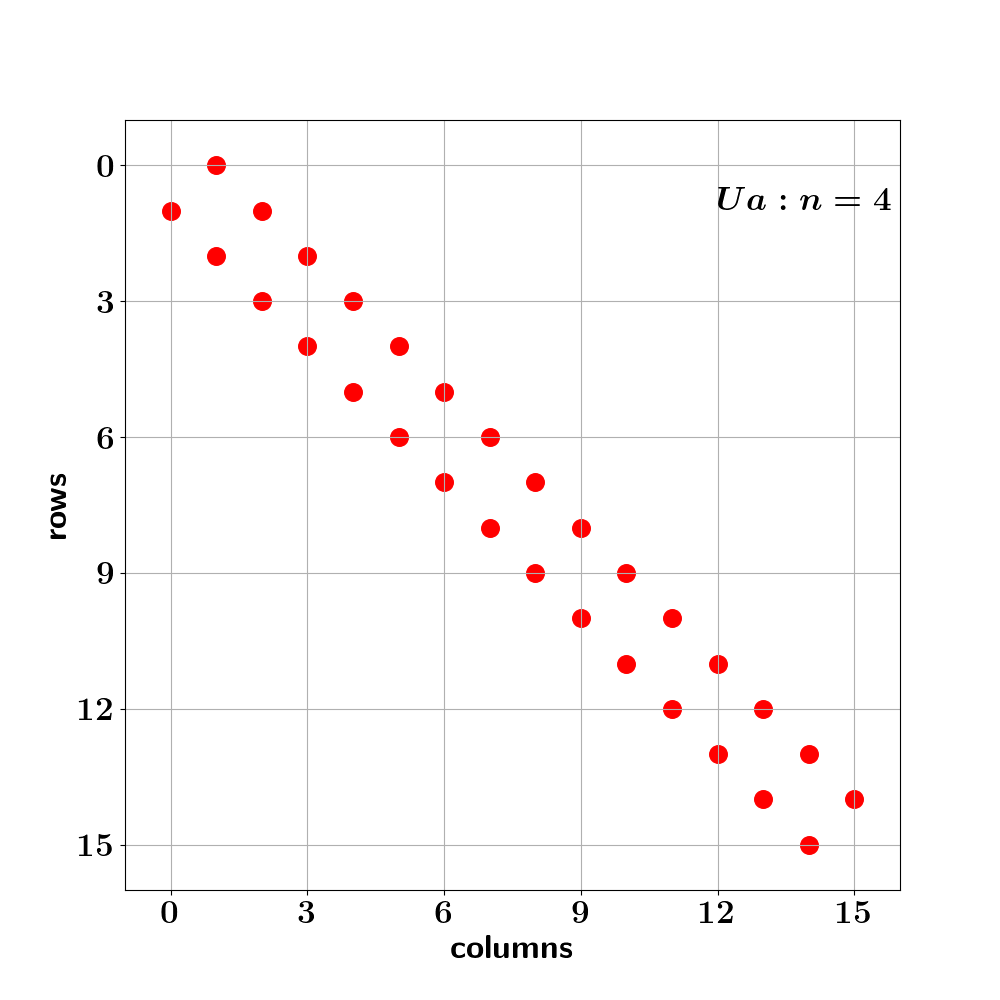

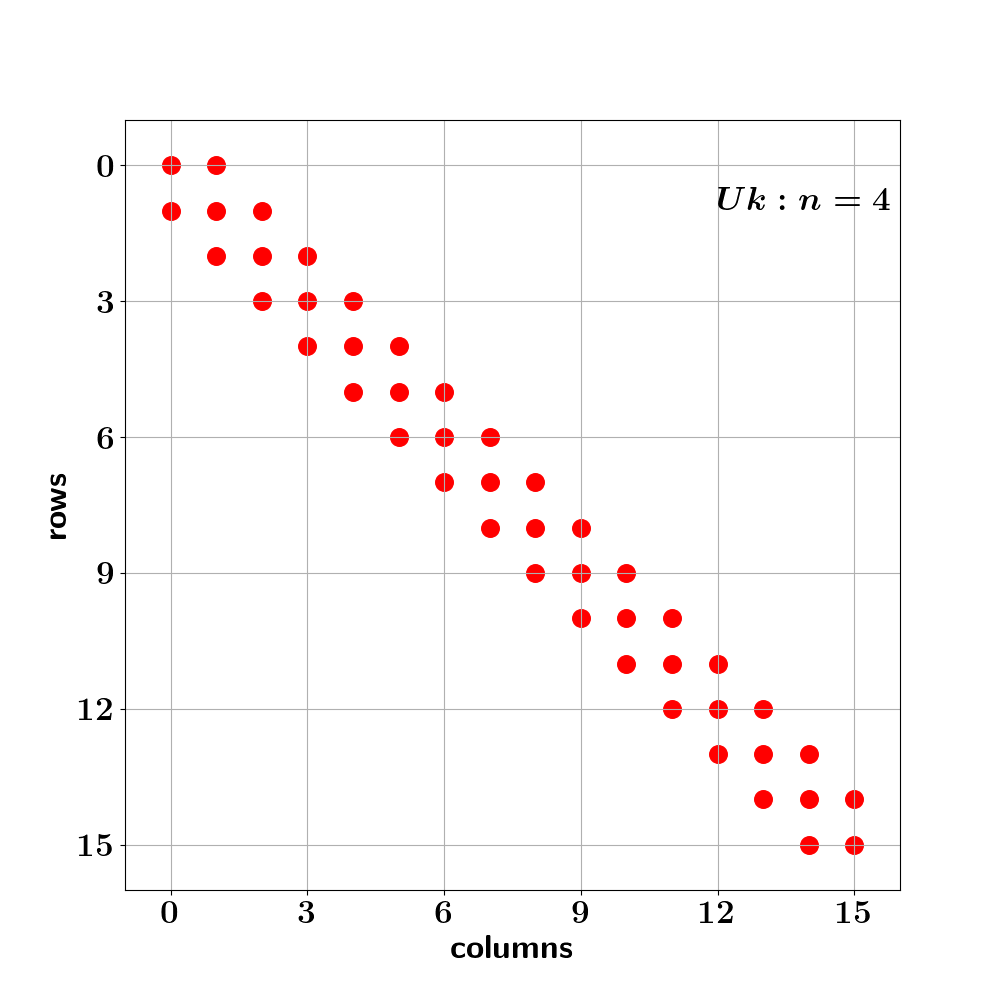

In [53]:
# ***********************************************************************************************************
# ***********************************************************************************************************
# ***********************************************************************************************************
# -------------------------------------------------------------------------
# --- Read D-matrices computed by the QuCF ---
# -------------------------------------------------------------------------
mix.reload_module(mix)
mix.reload_module(qucf_r)
mix.reload_module(kvn)

path_qc_ = "../QuCF/simulations/LCHS-KvN/matrices-D"

diff_n = [3, 4, 7]
dds_a = []
dds_k = []
for ii in range(len(diff_n)):
    print("--- Reading D-matrices for BE oracles of the matrix Aa for various nx.")
    fname_loc = "DA_n{:d}.hdf5".format(diff_n[ii])
    dd_loc    = qucf_r.read_matrix_sparse(path_qc_, fname_loc) 
    dds_a.append(dd_loc)

    print()
    print("--- Reading D-matrices for BE oracles of the matrix Ah for various nx.")
    fname_loc = "Dk-n{:d}.hdf5".format(diff_n[ii])
    dd_loc    = qucf_r.read_matrix_sparse(path_qc_, fname_loc) 
    dds_k.append(dd_loc)

# -------------------------------------------------------------------------
# --- Plot structures of D-matrices computed by the QuCF ---
# -------------------------------------------------------------------------
id_plot = 1
dds_a[id_plot]["A"].plot_structure("Ua: n={:d}".format(diff_n[id_plot]))
dds_k[id_plot]["A"].plot_structure("Uk: n={:d}".format(diff_n[id_plot]))
del id_plot

In [54]:
# -------------------------------------------------------------------------
# --- Print and plot elements in D-matrices' ---
# These D-matrices have only real values.
# -------------------------------------------------------------------------
def print_plot_D_elements(id_shift, dds_print, str_matrix, flag_plot = False):
    colors = ["b", "r", "g"]
    markers = ["o", "s", "*"]

    # --- Printing ---
    print("--- Elements in {:s} in the diagonal {:d} ---".format(str_matrix, id_shift))
    print()
    for ii in range(len(diff_n)):
        mix.print_array(
            kvn.get_diag(dds_print[ii]["A"].form_dense_matrix(), id_shift)[0].real,
            n_in_row = 8,
            ff=[6, 3, "f"]
        )
        print()

    # --- Plotting ---
    if flag_plot:
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for i1 in range(len(diff_n)):
            ii = len(diff_n) - i1 - 1
            n1 = diff_n[ii]
            ax.plot(
                np.array(range((1<<n1) - np.abs(id_shift))), 
                kvn.get_diag(dds_print[ii]["A"].form_dense_matrix(), id_shift)[0].real, 
                color=colors[ii], linewidth = 2, linestyle='-', marker = markers[ii],
                label = "n = {:d}".format(n1)
            )
        plt.xlabel('i')
        plt.ylabel("v")
        plt.title(str_matrix + ": diag = {:d}".format(id_shift))
        plt.legend()
        plt.grid(True)
        plt.show() 
# -----------------------------------------------------------------------------------

id_shift = -1
# dds_print, str_matrix = list(dds_a), "DA"
dds_print, str_matrix = list(dds_k), "Dk"

print_plot_D_elements(id_shift, dds_print, str_matrix)
del id_shift, dds_print, str_matrix

--- Elements in Dk in the diagonal -1 ---

 0.250  0.250  0.250  0.250  0.250  0.250  0.354 

 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.354 

 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
 0.250  0.250  0.250  0.250  0.250  0.250  0.250  0.250 
